# Machine Learning Models

In [ ]:
# Load libraries
import pandas as pd
import seaborn as sns
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import warnings
from sklearn.utils import resample
warnings.filterwarnings('ignore')
df = pd.read_csv('data/labeled_comments.csv')

minority_class = df[df['Label'] == 'Cyberbullying']
majority_class = df[df['Label'] == 'Not Cyberbullying']

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([majority_class, minority_upsampled])

X = balanced_data["Comment"].astype(str)
y = balanced_data["Label"].astype(str)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.3, random_state=1)
df["Label"].value_counts()

,count
Label,
Not Cyberbullying,17784
Cyberbullying,8150


### Support Vector Machine

In [ ]:
# Make predictions on validation dataset
import time
start_time = time.time()
pipeline = make_pipeline(TfidfVectorizer(), SVC(gamma="scale"))
pipeline.fit(X_train, Y_train)
predictions = pipeline.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(time.time()-start_time)

0.9445225377190516
[[4982  292]
 [ 300 5097]]
                   precision    recall  f1-score   support

    Cyberbullying       0.94      0.94      0.94      5274
Not Cyberbullying       0.95      0.94      0.95      5397

         accuracy                           0.94     10671
        macro avg       0.94      0.94      0.94     10671
     weighted avg       0.94      0.94      0.94     10671

266.0669438838959


### K Nearest Neighbor (KNN)

In [ ]:
# Make predictions on validation dataset
pipeline = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(weights='distance', n_neighbors=5))
pipeline.fit(X_train, Y_train)
predictions = pipeline.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9123793458907319
[[4468  806]
 [ 129 5268]]
                   precision    recall  f1-score   support

    Cyberbullying       0.97      0.85      0.91      5274
Not Cyberbullying       0.87      0.98      0.92      5397

         accuracy                           0.91     10671
        macro avg       0.92      0.91      0.91     10671
     weighted avg       0.92      0.91      0.91     10671



### Decision Tree Classification

In [ ]:
# Make predictions on validation dataset
pipeline = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_split=2))
pipeline.fit(X_train, Y_train)
predictions = pipeline.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7328272889138787
[[3364 1910]
 [ 941 4456]]
                   precision    recall  f1-score   support

    Cyberbullying       0.78      0.64      0.70      5274
Not Cyberbullying       0.70      0.83      0.76      5397

         accuracy                           0.73     10671
        macro avg       0.74      0.73      0.73     10671
     weighted avg       0.74      0.73      0.73     10671



### Logistic Regression

In [ ]:
# Make predictions on validation dataset
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(solver='saga', multi_class='auto', class_weight='balanced'))
pipeline.fit(X_train, Y_train)
predictions = pipeline.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8874519726361165
[[4725  549]
 [ 652 4745]]
                   precision    recall  f1-score   support

    Cyberbullying       0.88      0.90      0.89      5274
Not Cyberbullying       0.90      0.88      0.89      5397

         accuracy                           0.89     10671
        macro avg       0.89      0.89      0.89     10671
     weighted avg       0.89      0.89      0.89     10671



### Cross-Validaiton of models

In [ ]:
warnings.filterwarnings('ignore')
models = []
models.append(('LR', LogisticRegression(solver='saga', multi_class='auto', class_weight='balanced')))
models.append(('KNN', KNeighborsClassifier(weights='distance', n_neighbors=2)))
models.append(('CART', DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_split=2)))
models.append(('SVM', SVC(gamma='scale')))
# evaluate each model in turn
result = []
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(make_pipeline(TfidfVectorizer(), model), X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 result.append([name, cv_results.mean()])
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 pipeline = make_pipeline(TfidfVectorizer(), model)
 pipeline.fit(X_train, Y_train)
 predictions = pipeline.predict(X_validation)
 # Evaluate predictions
 print(accuracy_score(Y_validation, predictions))
 print(confusion_matrix(Y_validation, predictions))
 print(classification_report(Y_validation, predictions))

LR: 0.877737 (0.005033)
0.8874519726361165
[[4725  549]
 [ 652 4745]]
                   precision    recall  f1-score   support

    Cyberbullying       0.88      0.90      0.89      5274
Not Cyberbullying       0.90      0.88      0.89      5397

         accuracy                           0.89     10671
        macro avg       0.89      0.89      0.89     10671
     weighted avg       0.89      0.89      0.89     10671

KNN: 0.902398 (0.005331)
0.9105051073001593
[[4490  784]
 [ 171 5226]]
                   precision    recall  f1-score   support

    Cyberbullying       0.96      0.85      0.90      5274
Not Cyberbullying       0.87      0.97      0.92      5397

         accuracy                           0.91     10671
        macro avg       0.92      0.91      0.91     10671
     weighted avg       0.92      0.91      0.91     10671

CART: 0.735953 (0.015295)
0.7334832724205791
[[3361 1913]
 [ 931 4466]]
                   precision    recall  f1-score   support

    Cyberbull

### Box Plot of models using Cross Validation

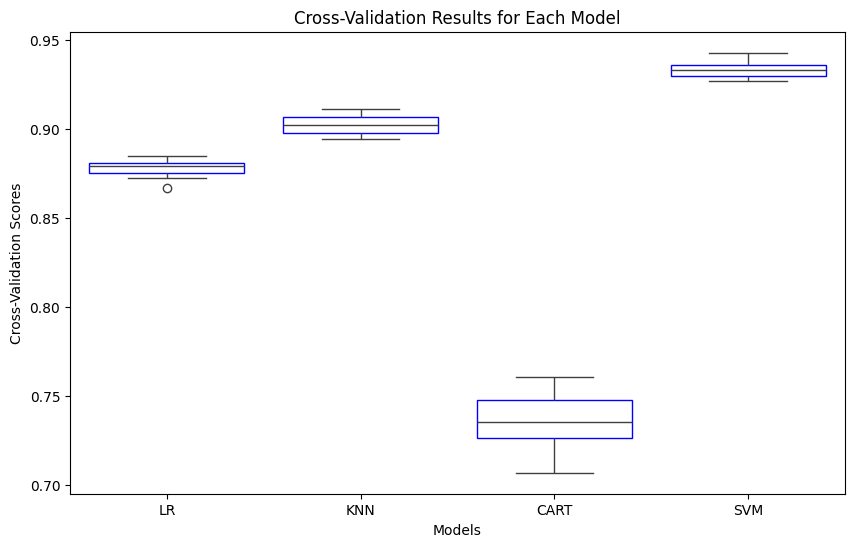

In [ ]:
all_scores = [score for scores in results for score in scores]
all_labels = [name for name, scores in zip(names, results) for _ in scores]

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=all_labels, y=all_scores, boxprops=dict(facecolor='none', edgecolor='blue'))

# Customize the plot
plt.title('Cross-Validation Results for Each Model')
plt.xlabel('Models')
plt.ylabel('Cross-Validation Scores')

plt.show()